In [2]:
import warnings
warnings.filterwarnings('ignore')
import gc
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline
sns.set()
from matplotlib.ticker import MaxNLocator


In [3]:
data = pd.read_csv("C:/Users/yoges/Desktop/Python Assignment 2_BI/Ecommerce - UK Retailer.csv",encoding='ISO-8859-1')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
data.describe(include=object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


# 1. Perform Basic EDA 

## a. Boxplot – All Numeric Variables 

<AxesSubplot:xlabel='Quantity'>

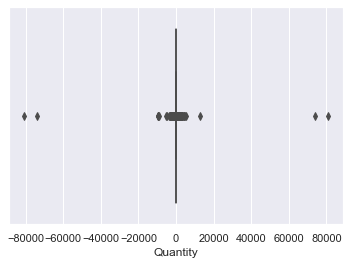

In [8]:
sns.boxplot(data['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

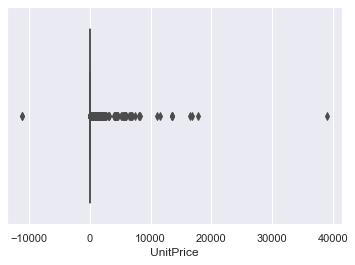

In [9]:
sns.boxplot(data['UnitPrice'])

<AxesSubplot:xlabel='CustomerID'>

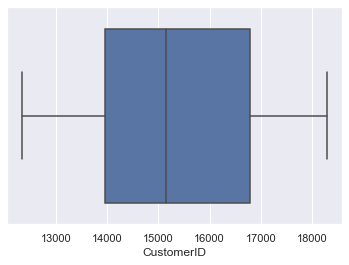

In [10]:
sns.boxplot(data['CustomerID'])

## b. Histogram – All Numeric Variables 


<function matplotlib.pyplot.show(close=None, block=None)>

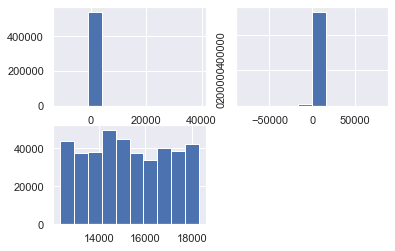

In [11]:
plt.subplot(2,2,1)
plt.hist(data["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(data["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(data["CustomerID"])
plt.show

## c. Distribution Plot – All Numeric Variables

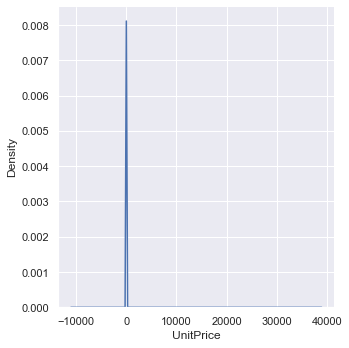

In [13]:
sns.displot(data, x="UnitPrice",kind='kde')

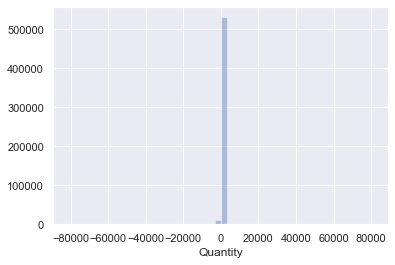

In [14]:
sns.distplot(data.Quantity, kde=False);

<AxesSubplot:xlabel='CustomerID'>

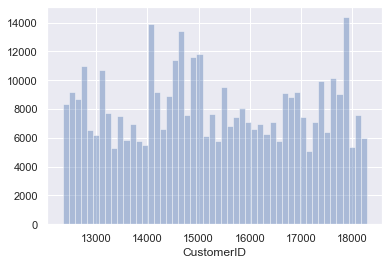

In [15]:
sns.distplot(data.CustomerID, kde=False)

## d. Aggregation for all numerical Columns 

In [16]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## e. Unique Values across all columns 

In [17]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [18]:
for col in data:
    print(data[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

## f. Duplicate values across all columns 

In [19]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


## g. Correlation – Heatmap - All Numeric Variables

<AxesSubplot:>

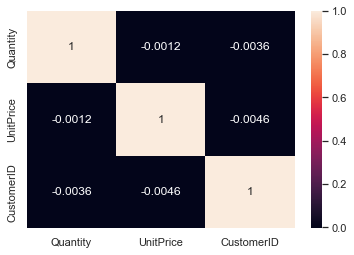

In [20]:
sns.heatmap(data.corr(),annot=True)

## h. Regression Plot - All Numeric Variables

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(data = data, x= "Quantity", y ="UnitPrice")
plt.title("PRICE VS QUANTITY RELATION")

## i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [ ]:
numeric_col=data[['Quantity','UnitPrice','CustomerID']]
catag_col=data[['InvoiceNo','StockCode','Description','InvoiceDate','Country']]

## j. Pair plot - All Numeric Variables

In [ ]:
sns.pairplot(numeric_col)
plt.show

# l. Plot the skewness - All Numeric Variables

In [ ]:
plt.subplots(figsize=(10,8))
sns.distplot(data.Quantity<50, label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

# 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode) 

In [20]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
data['CustomerID']=data["CustomerID"].fillna(data["CustomerID"].mean())

In [19]:
data.dropna(axis=0,inplace=True)

In [20]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 3. Remove duplicate rows 

In [21]:
data=data.drop_duplicates(keep=False)

In [25]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# 4. Remove rows which have negative values in Quantity column

In [26]:
data=data[data.Quantity>0]

# 5. Add the columns - Month, Day and Hour for the invoice 

In [22]:
import datetime as dt
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [23]:
data.insert(loc=2, column='Year_month', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))
data.insert(loc=3, column='Month', value=data.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
data.insert(loc=4, column='Day', value=(data.InvoiceDate.dt.dayofweek)+1)
data.insert(loc=5, column='Hour', value=data.InvoiceDate.dt.hour)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530308 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530308 non-null  object        
 1   StockCode    530308 non-null  object        
 2   Year_month   530308 non-null  int64         
 3   Month        530308 non-null  int64         
 4   Day          530308 non-null  int64         
 5   Hour         530308 non-null  int64         
 6   Description  530308 non-null  object        
 7   Quantity     530308 non-null  int64         
 8   InvoiceDate  530308 non-null  datetime64[ns]
 9   UnitPrice    530308 non-null  float64       
 10  CustomerID   530308 non-null  float64       
 11  Country      530308 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 52.6+ MB


In [30]:
data.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 6. How many orders made by the customers?

In [36]:
index = pd.Index(data['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 530308


In [31]:
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


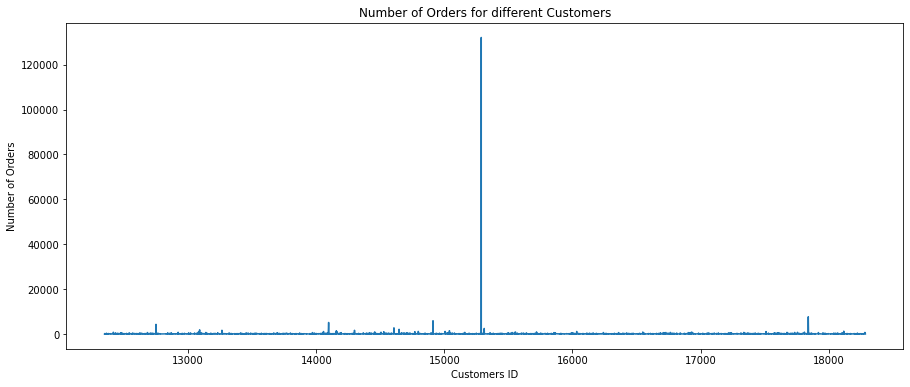

In [26]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [27]:
orders['CustomerID'] = orders['CustomerID'].astype('int64')

In [34]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2176,15287,United Kingdom,131300
4028,17841,United Kingdom,7523
1888,14911,EIRE,5667
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4243


# 8. How much money spent by the customers? 

In [28]:
data['Amount_Spent'] = data['Quantity'] * data['UnitPrice']

In [35]:
money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()
print(money_spent)

      CustomerID         Country  Amount_Spent
0        12346.0  United Kingdom          0.00
1        12347.0         Iceland       4310.00
2        12348.0         Finland       1797.24
3        12349.0           Italy       1757.55
4        12350.0          Norway        334.40
...          ...             ...           ...
4384     18280.0  United Kingdom        180.60
4385     18281.0  United Kingdom         80.82
4386     18282.0  United Kingdom        176.60
4387     18283.0  United Kingdom       1998.68
4388     18287.0  United Kingdom       1837.28

[4389 rows x 3 columns]


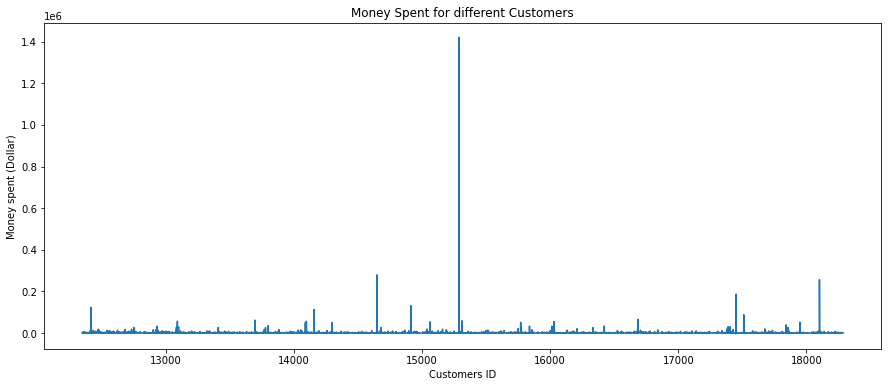

In [29]:
money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

# 9. TOP 5 customers with highest money spent 

In [33]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,Amount_Spent
2191,15287.69057,United Kingdom,1420012.74
1711,14646.00000,Netherlands,279489.02
4250,18102.00000,United Kingdom,256438.49
3775,17450.00000,United Kingdom,187162.17
1903,14911.00000,EIRE,132344.84


# 10. How many orders per month? 

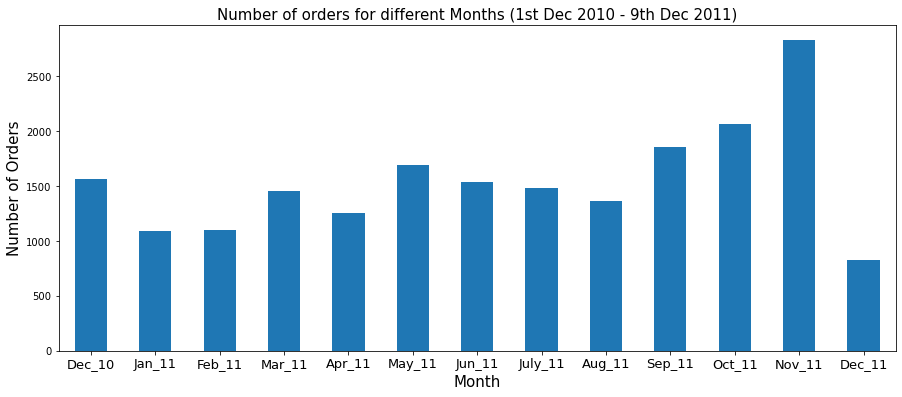

In [39]:
uk = data.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
uk.set_xlabel('Month',fontsize=15)
uk.set_ylabel('Number of Orders',fontsize=15)
uk.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
uk.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 11. How many orders per day? 

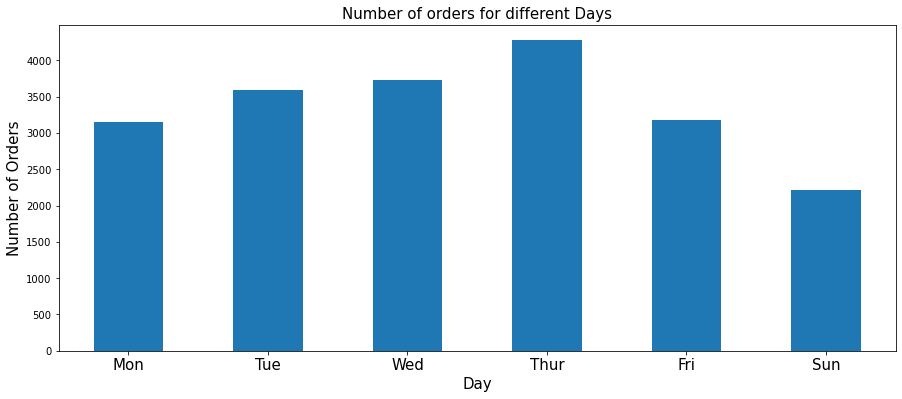

In [43]:
uk = data.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
uk.set_xlabel('Day',fontsize=15)
uk.set_ylabel('Number of Orders',fontsize=15)
uk.set_title('Number of orders for different Days',fontsize=15)
uk.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour? 

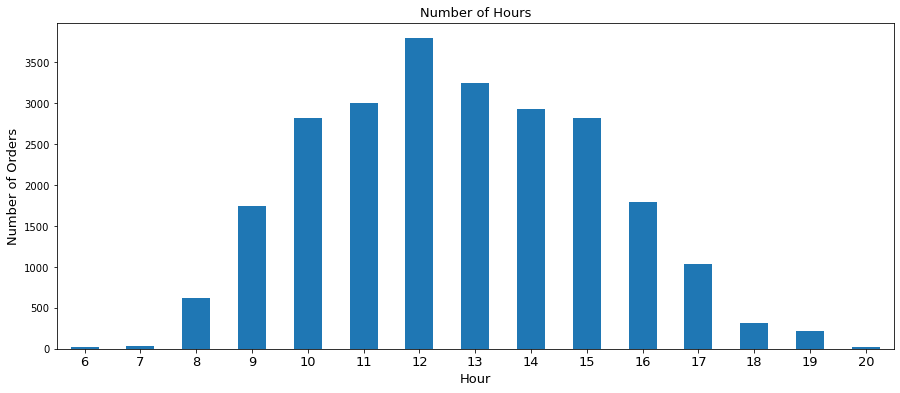

In [32]:
color = sns.color_palette()
ax = data.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()


# 13. How many orders for each country? 

In [36]:
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


# 14. Orders trend across months 

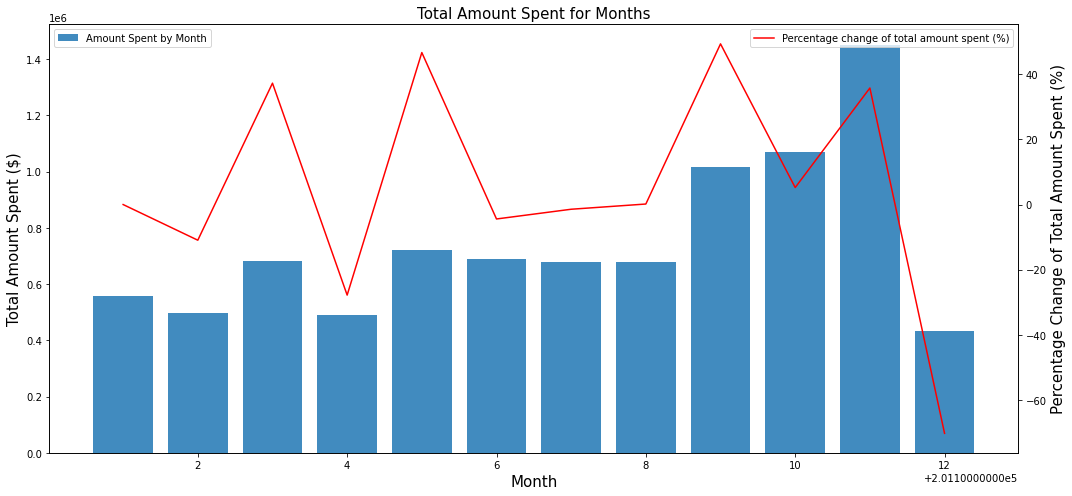

In [30]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(data.groupby(by=['Year_month'])['Amount_Spent'].sum().index.tolist()[1:],
        data.groupby(by=['Year_month'])['Amount_Spent'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(data.groupby(by=['Year_month'])['Amount_Spent'].sum().index.tolist()[1:], 
         data.groupby(by=['Year_month'])['Amount_Spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# 15. How much money spent by each country?

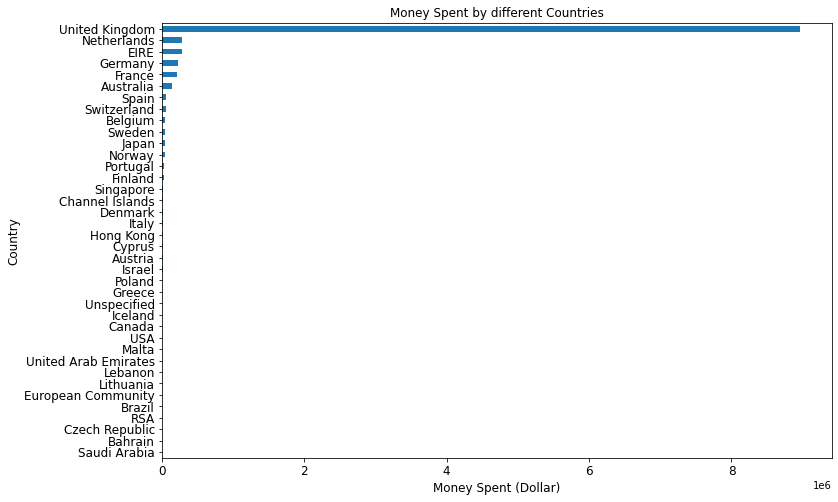

In [41]:
group_country_amount_spent = data.groupby('Country')['Amount_Spent'].sum().sort_values()

plt.subplots(figsize=(12,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()